In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
t= np.arange(1,17)
Serie = np.array([235, 298, 221, 340, 268, 327, 242, 378, 300, 368, 292, 421, 334, 421, 322, 465])

Graphical representation of sales trends

<function matplotlib.pyplot.show(close=None, block=None)>

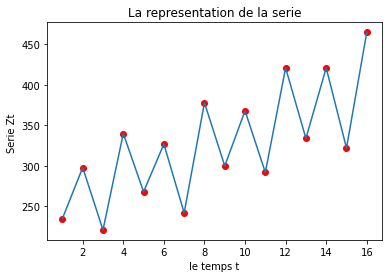

In [20]:
plt.plot(t,Serie)
plt.scatter(t,Serie, color="red")
plt.title("La representation de la serie")
plt.xlabel("le temps t")
plt.ylabel("Serie Zt ")
plt.show

Determination of the trend (linear adjustment):

In [62]:
from scipy import stats

lin_reg = stats.linregress(t, Serie)
lin_reg

LinregressResult(slope=10.447058823529412, intercept=238.2, rvalue=0.7060321575923854, pvalue=0.0022389013360068605, stderr=2.8005869379885056, intercept_stderr=27.080386868380895)

In [63]:
T=lin_reg[0]*t+lin_reg[1]
T

array([248.64705882, 259.09411765, 269.54117647, 279.98823529,
       290.43529412, 300.88235294, 311.32941176, 321.77647059,
       332.22352941, 342.67058824, 353.11764706, 363.56470588,
       374.01176471, 384.45882353, 394.90588235, 405.35294118])

In [25]:
St= Serie/T
St

array([0.94514157, 1.15022387, 0.81997625, 1.21445921, 0.92286501,
       1.08695652, 0.77743511, 1.17493473, 0.90317919, 1.07413894,
       0.82710174, 1.15824805, 0.8932392 , 1.0953273 , 0.81560284,
       1.14746817])

Calculation of seasonal coefficients:

In [35]:
Composant_saisonaire= St.reshape(4,4).mean(axis=0)
Composant_saisonaire

array([0.91610624, 1.10166166, 0.81002899, 1.17377754])

Establishment of forecasts over 1 year :

In [36]:
prev_ans= (lin_reg[0]*np.arange(17,21)+lin_reg[1]) * Composant_saisonaire
prev_ans

array([380.8070429 , 469.44006503, 353.62625396, 524.67855904])

Correction of the series for seasonal variations :

In [43]:
CVS = (Serie.reshape(4,4)/Composant_saisonaire).reshape(16)
CVS

array([256.52046573, 270.50047377, 272.82974304, 289.66306586,
       292.54248858, 296.82434538, 298.75474125, 322.03717322,
       327.47293498, 334.04085352, 360.48092745, 358.67103155,
       364.58653427, 382.14999818, 397.51663918, 396.15684007])

Report all the results of the study on the same graph :

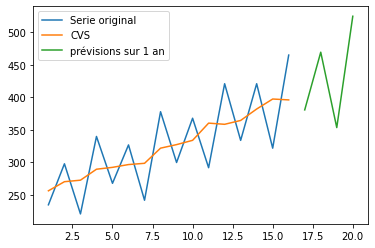

In [58]:
plt.plot(t,Serie, label="Serie original")
plt.plot(t, CVS, label="CVS")
plt.plot(np.arange(17,21),prev_ans, label="prévisions sur 1 an")
plt.legend()
plt.show()